<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/telematics_syn_V9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')

# Specify file path

file_path = '/content/drive/My Drive/telematics_syn.csv'

# Import pandas (assuming you want to use it to read the CSV)
import pandas as pd

# Read the CSV file
df = pd.read_csv(file_path)
print(df.shape)  # Should print (100000, 52)
print(df.head()) # To check the first few rows

Mounted at /content/drive
(100000, 52)
   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score  \
0       366           45        Male       -1  Married  Commute         609.0   
1       182           44      Female        3  Married  Commute         575.0   
2       184           48      Female        6  Married  Commute         847.0   
3       183           71        Male        6  Married  Private         842.0   
4       183           84        Male       10  Married  Private         856.0   

  Region  Annual.miles.drive  Years.noclaims  ...  Left.turn.intensity10  \
0  Urban             6213.71              25  ...                    1.0   
1  Urban            12427.42              20  ...                   58.0   
2  Urban            12427.42              14  ...                    0.0   
3  Urban             6213.71              43  ...                    0.0   
4  Urban             6213.71              65  ...                    2.0   

   Left.turn.inte

In [2]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# Display the first few rows of the dataframe
print(df.head())

   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12  NB_Claim    AMT_Claim
0       366           45        Male       -1  Married  Commute         609.0  Urban             6213.71              25         70           0.849315  

In [3]:
# Exploratory Data Analysis (EDA)
print("Summary statistics:\n", df.describe())

Summary statistics:
             Duration    Insured.age        Car.age   Credit.score  Annual.miles.drive  Years.noclaims      Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm   Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12      NB_Claim      AMT_Claim
count  100000.000000  100000.000000  100000.000000  100000.000000       100000.000000   100000.000000  100000.000000      100000.000000    

In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Duration                  0
Insured.age               0
Insured.sex               0
Car.age                   0
Marital                   0
Car.use                   0
Credit.score              0
Region                    0
Annual.miles.drive        0
Years.noclaims            0
Territory                 0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct.drive.sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles             0
Bra

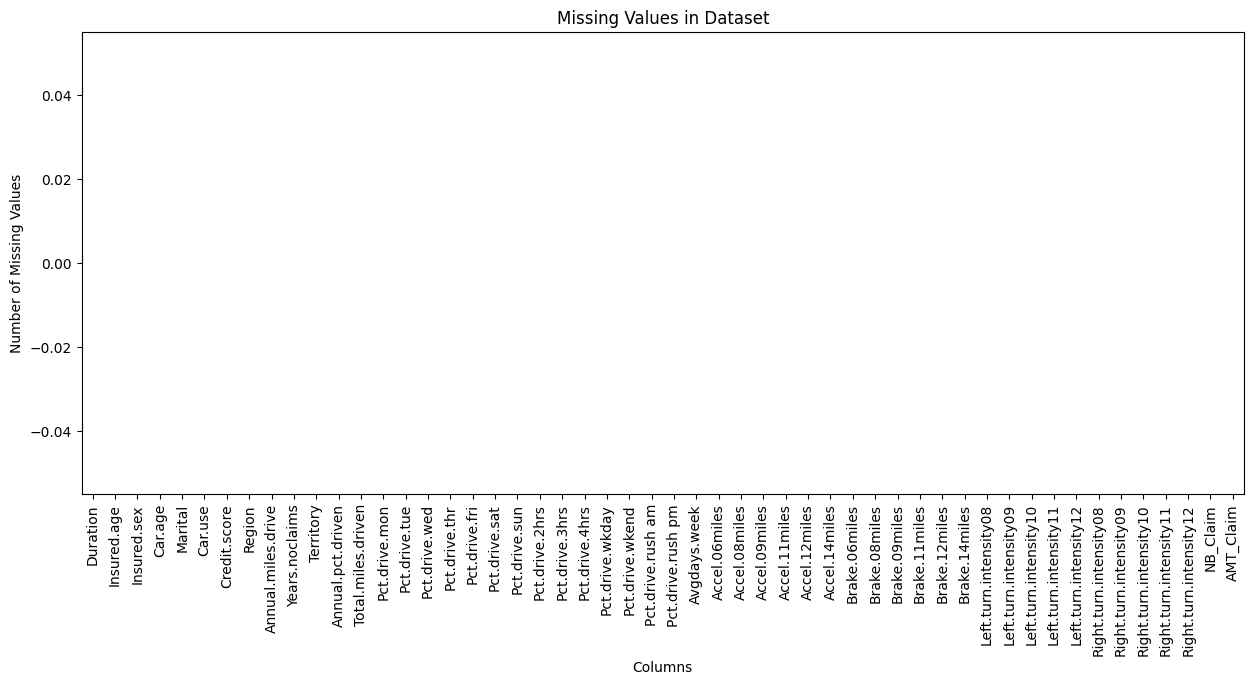

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
missing_values = df.isnull().sum()

# Plotting the missing values
missing_values.plot(kind='bar', figsize=(15, 6))
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

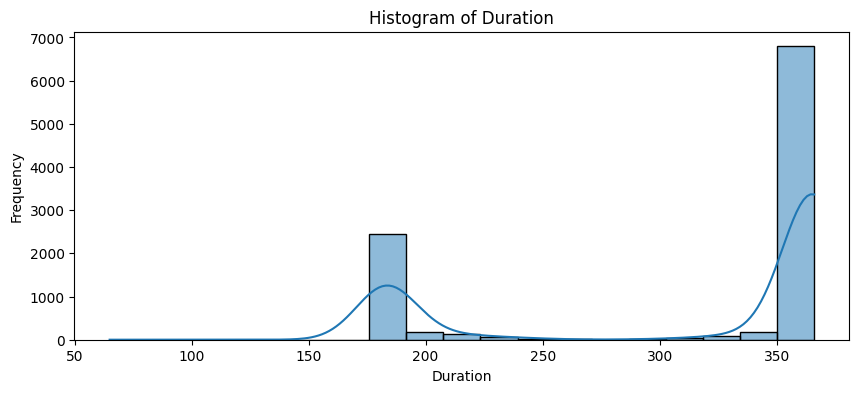

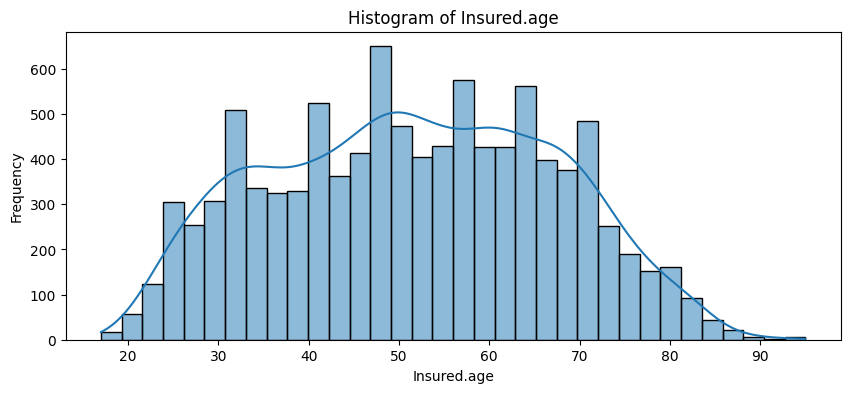

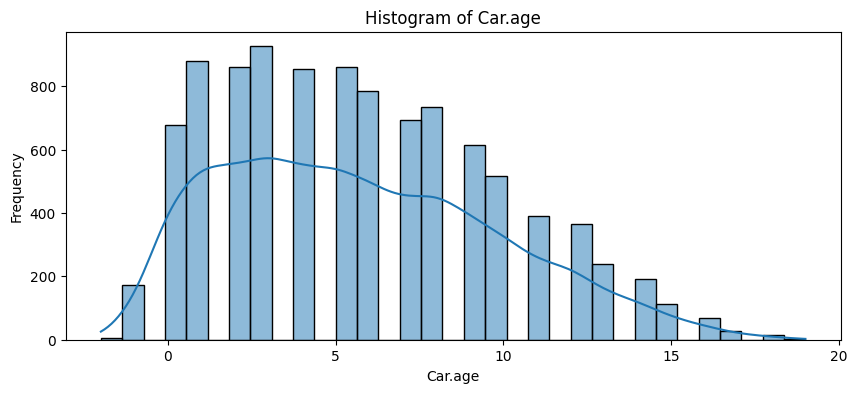

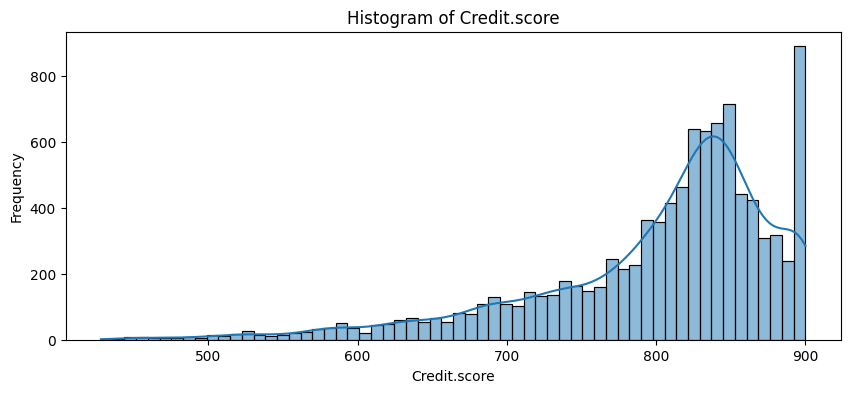

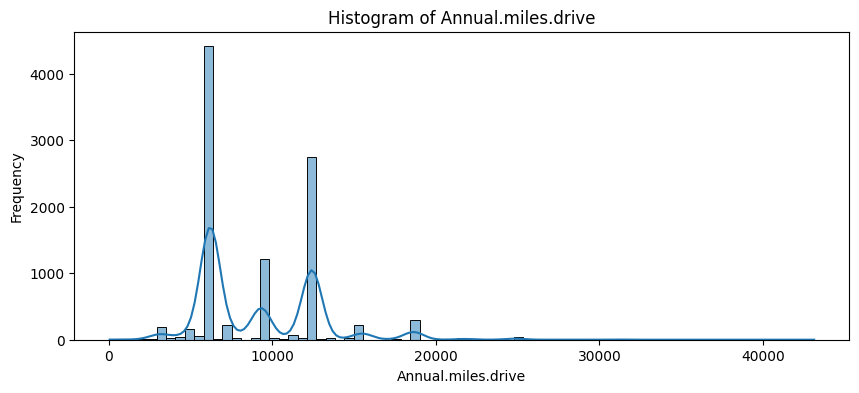

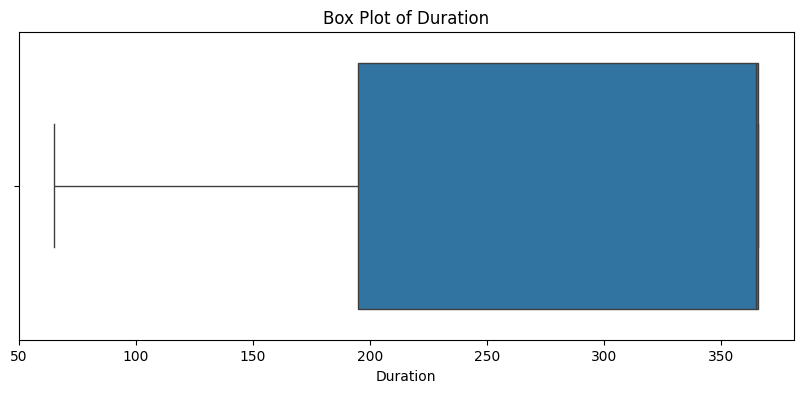

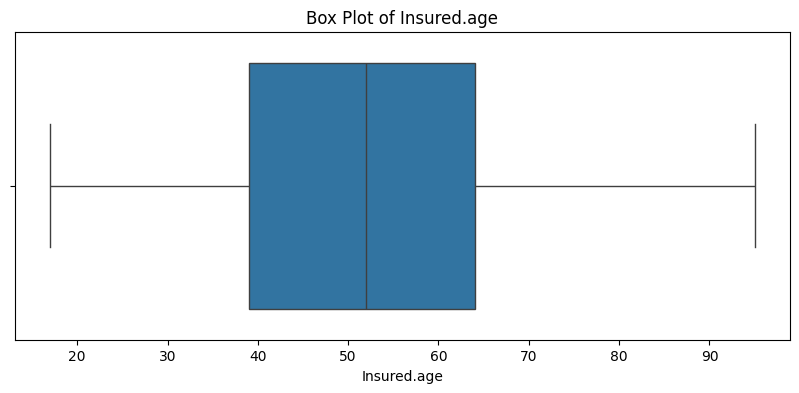

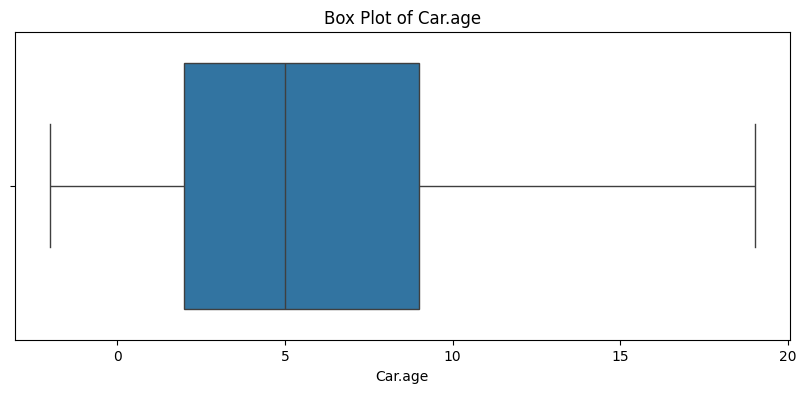

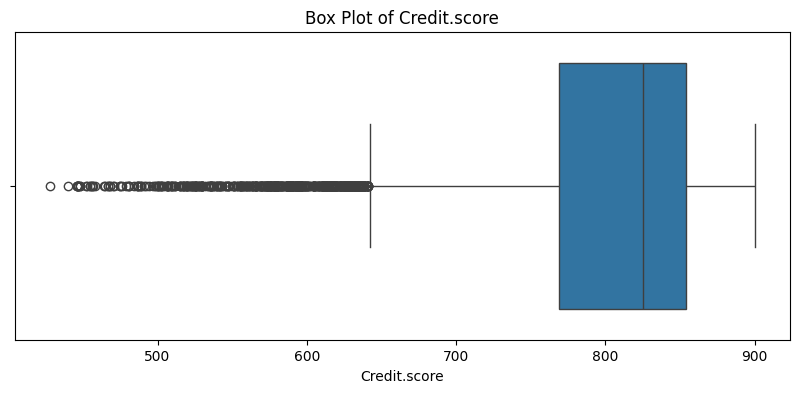

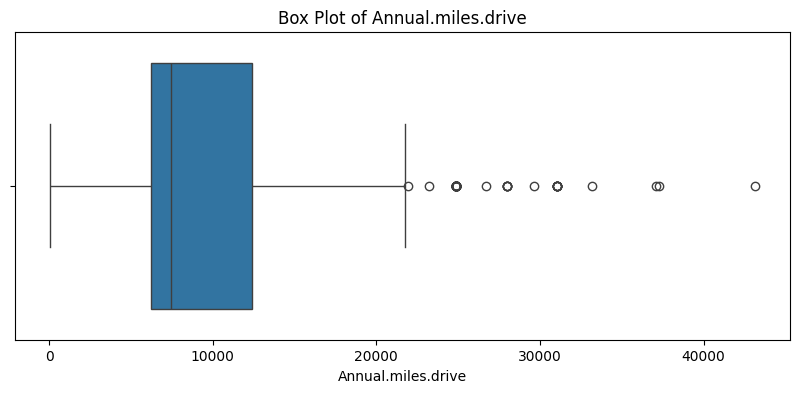

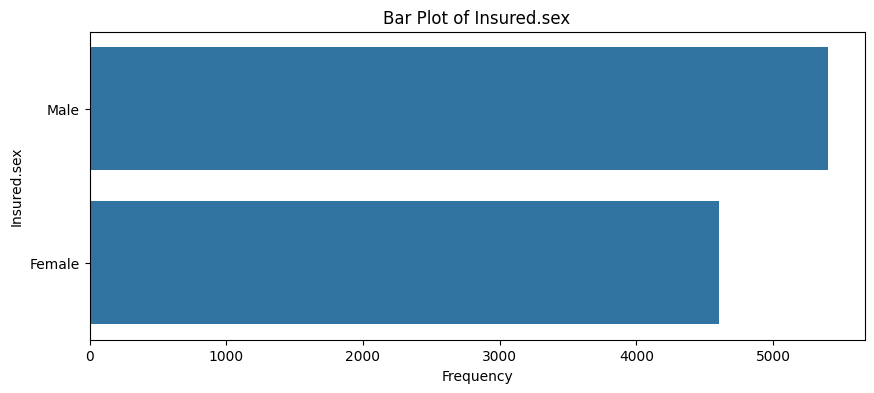

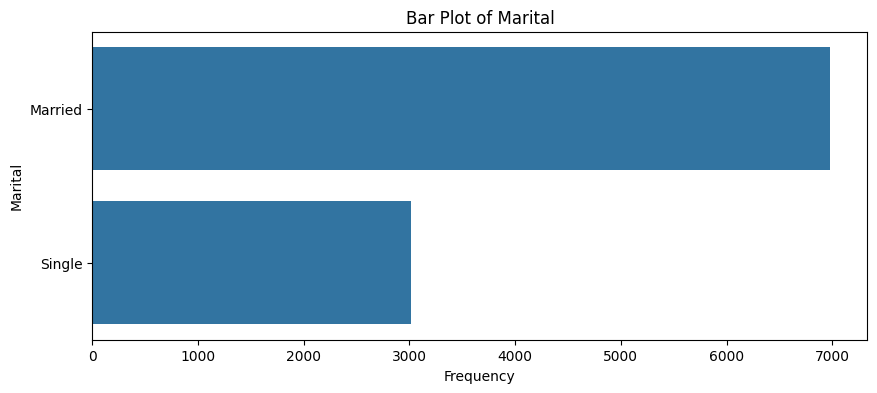

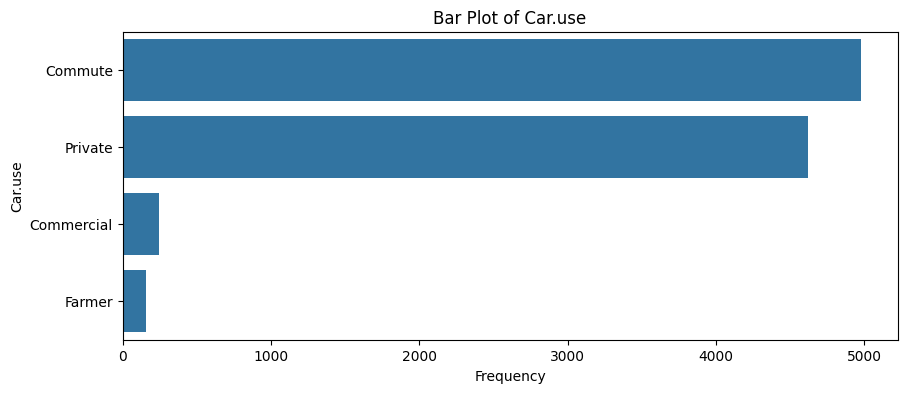

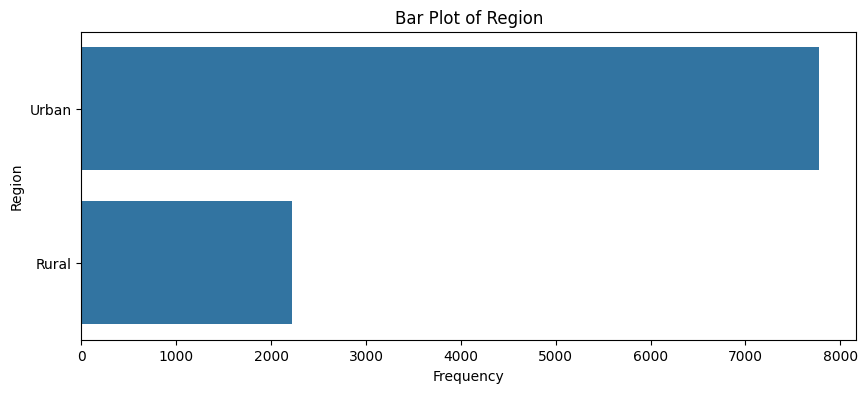

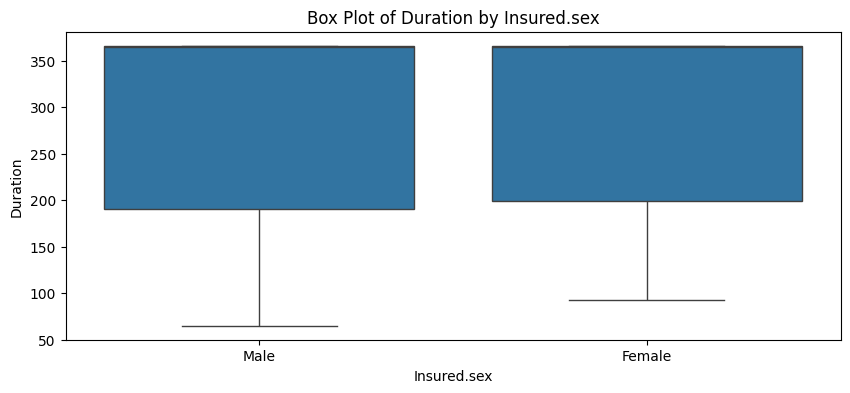

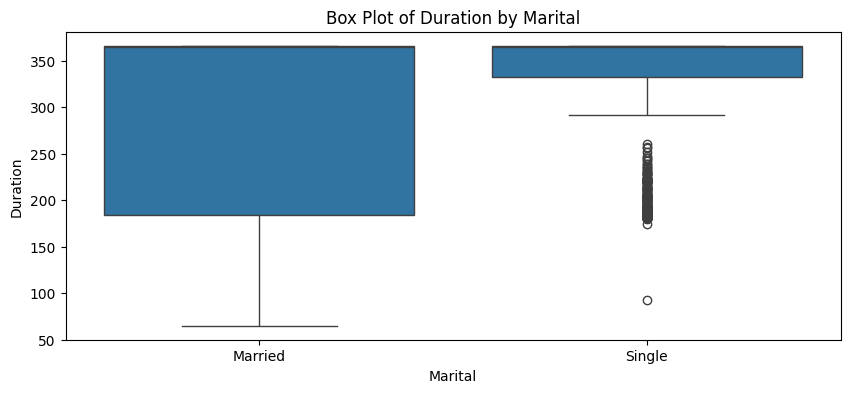

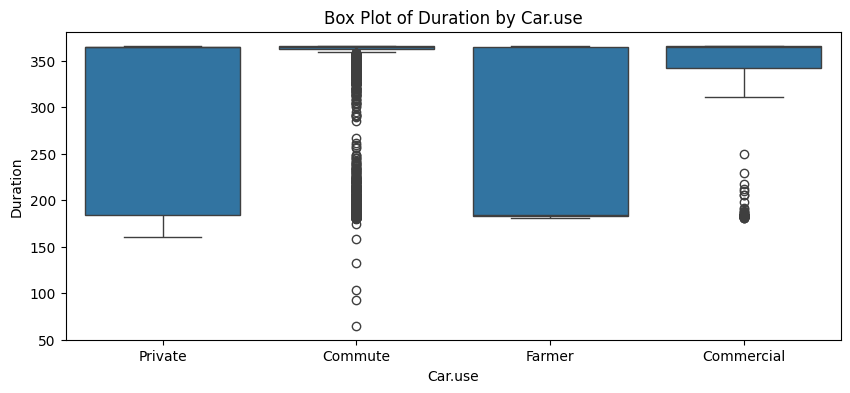

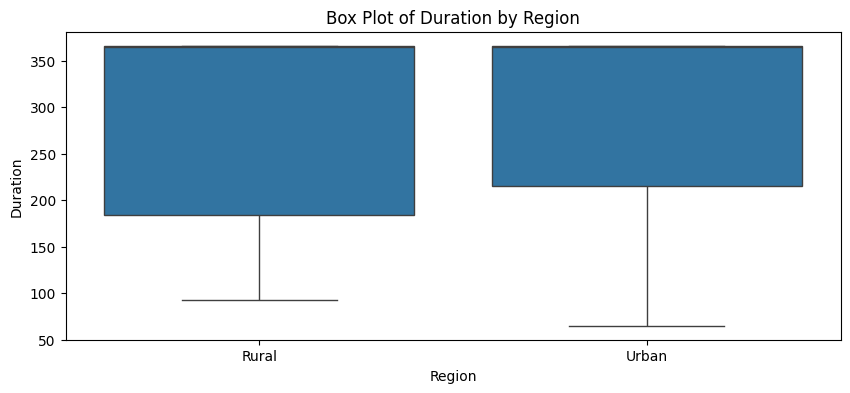

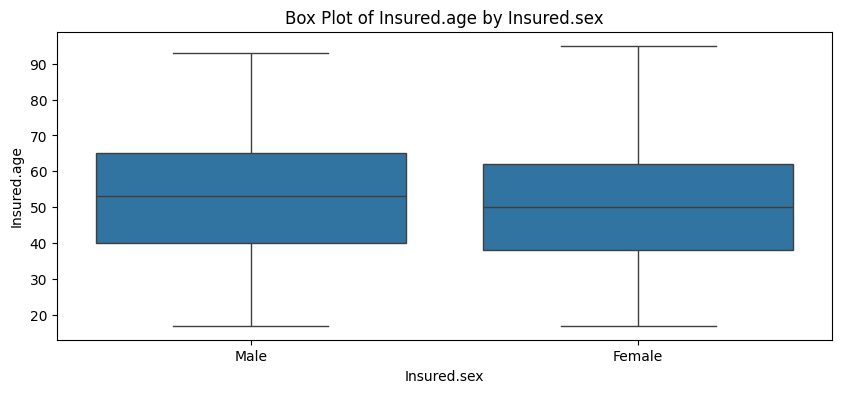

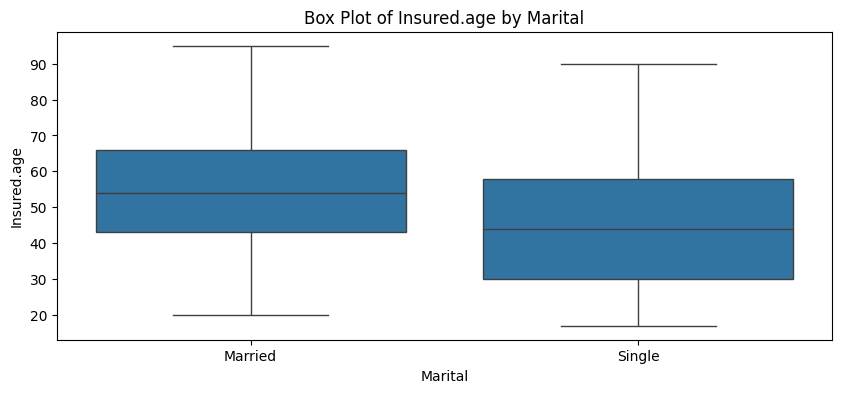

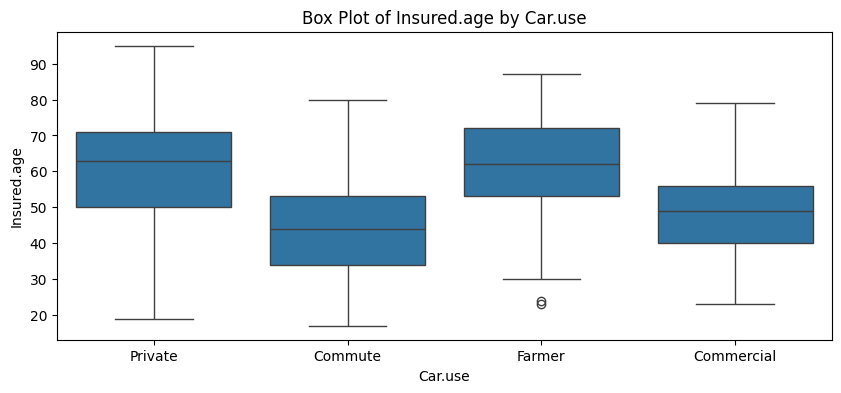

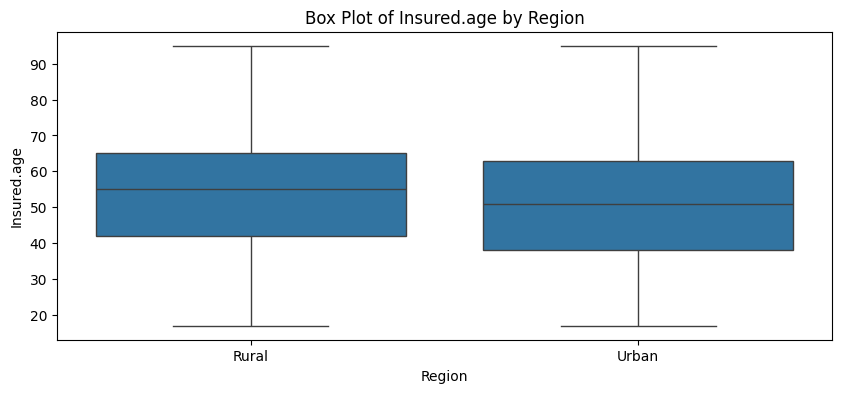

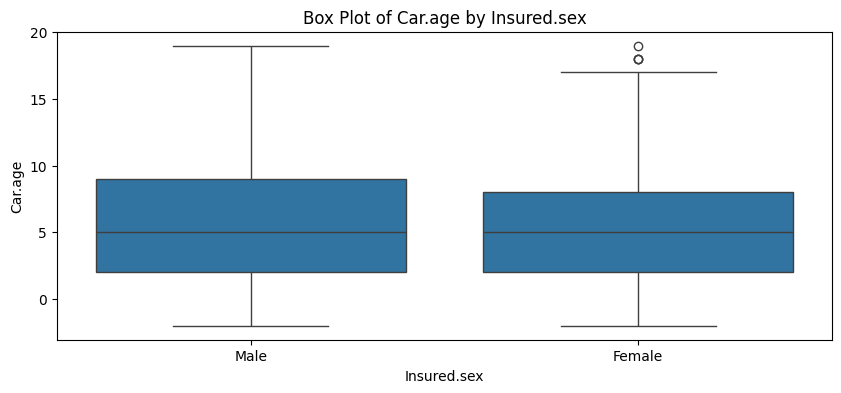

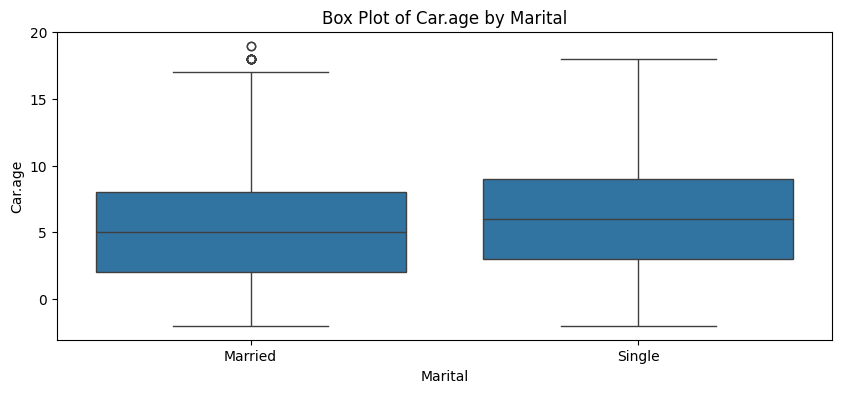

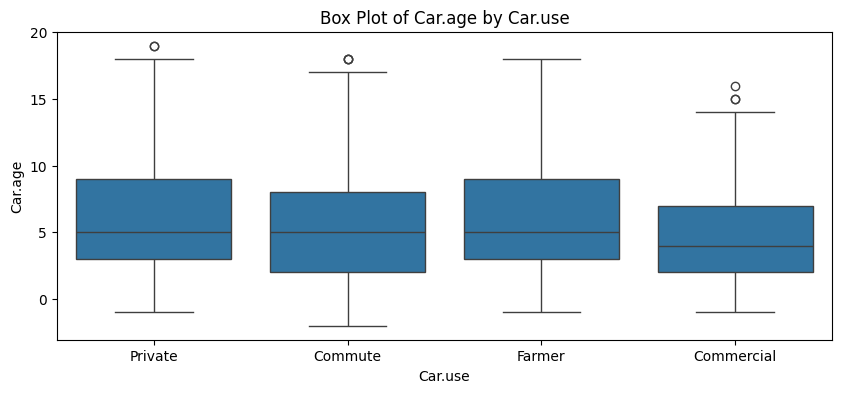

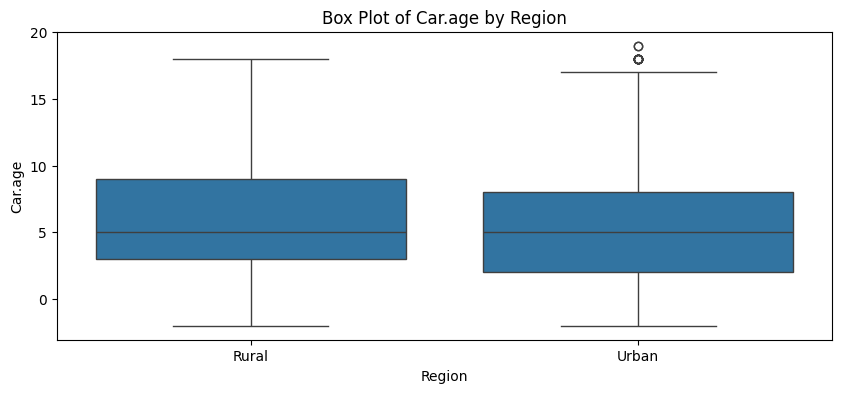

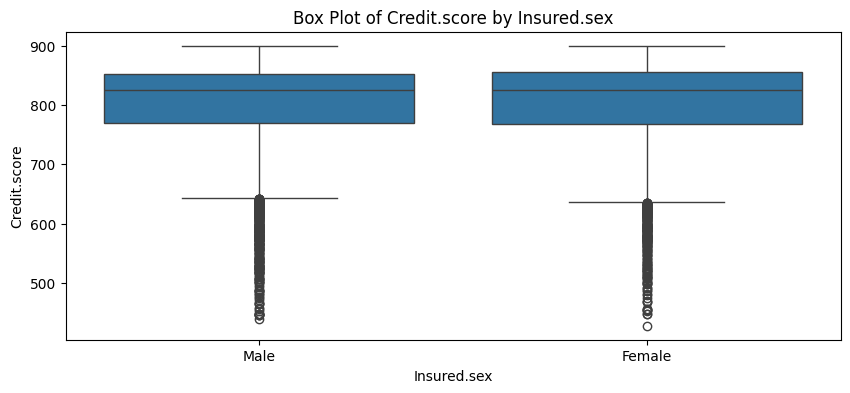

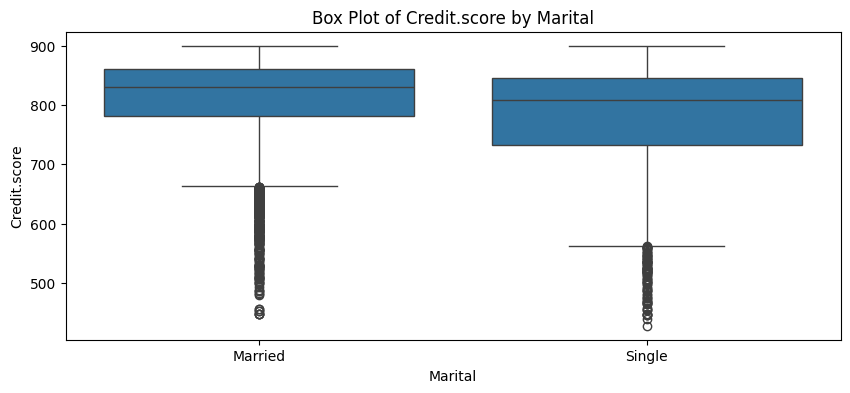

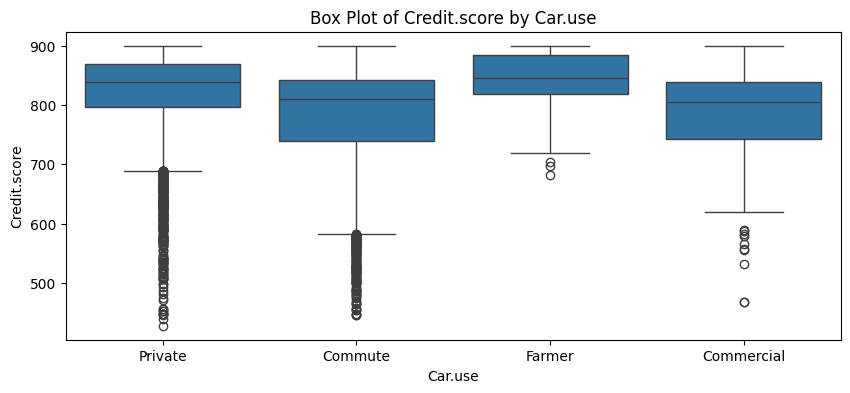

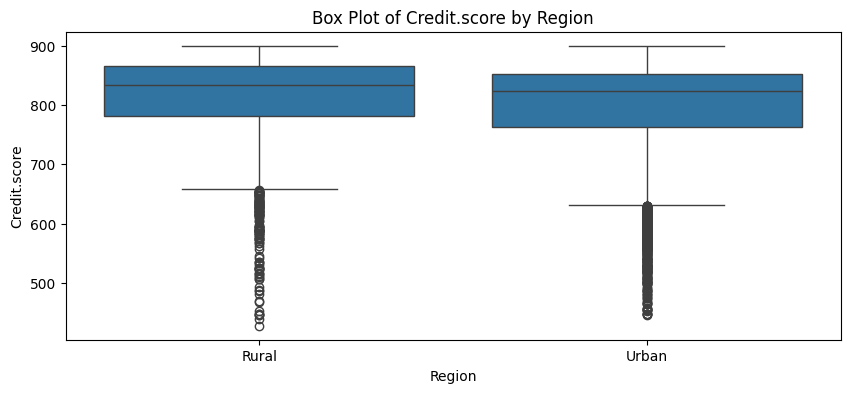

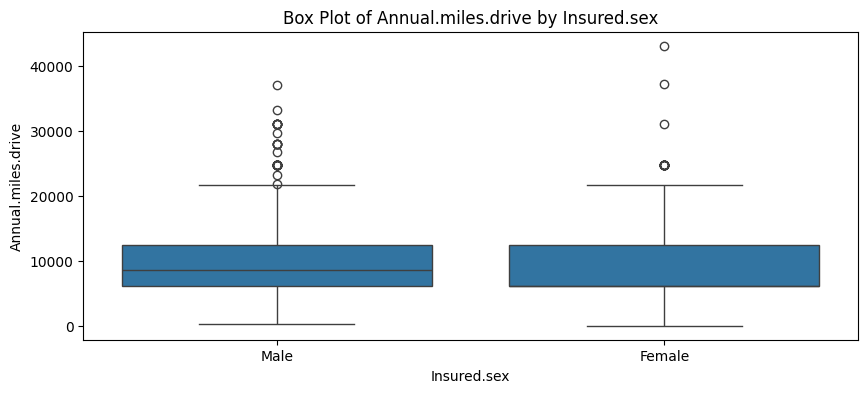

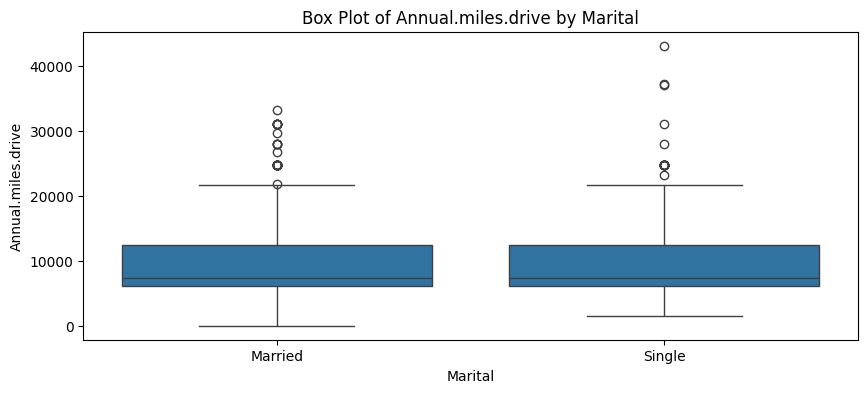

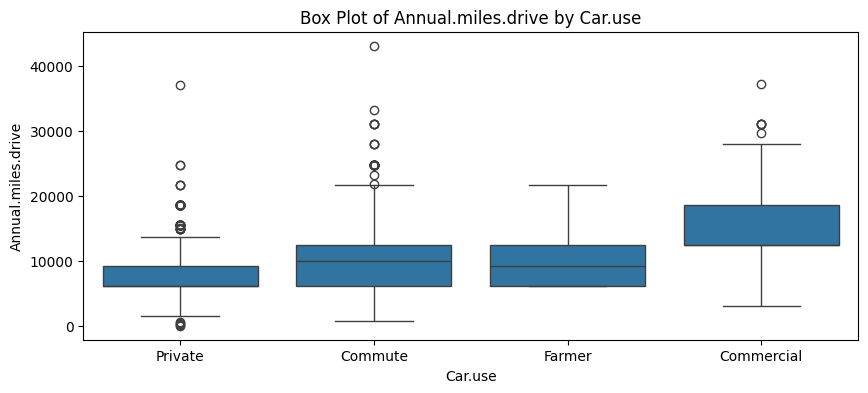

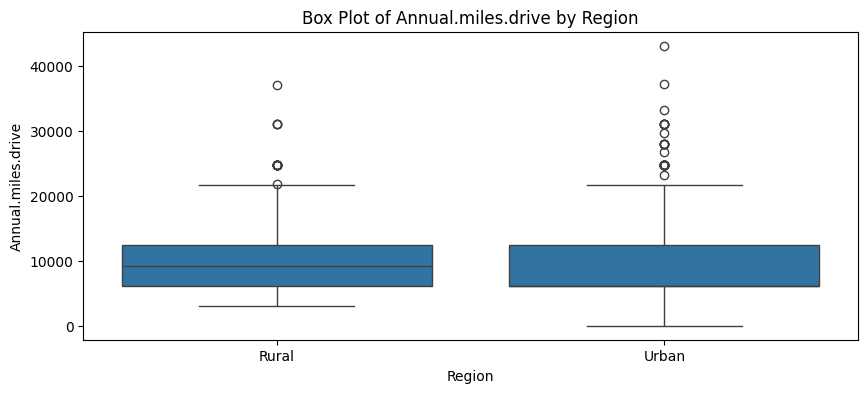

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']

# Subsample the data if necessary (e.g., 10% of the data)
sample_size = int(len(df) * 0.1)
df_sample = df.sample(n=sample_size, random_state=42)

# Plot histograms for numerical columns
for column in numerical_columns[:5]:  # Limit to first 5 numerical columns
    plt.figure(figsize=(10, 4))
    sns.histplot(df_sample[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot box plots for numerical columns
for column in numerical_columns[:5]:  # Limit to first 5 numerical columns
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_sample[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# Plot bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df_sample[column], order=df_sample[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()

# Plot box plots for numerical columns grouped by categorical columns
for num_col in numerical_columns[:5]:  # Limit to first 5 numerical columns
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df_sample[cat_col], y=df_sample[num_col])
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()



In [7]:
num_columns = df.shape[1]
print("Number of columns:", num_columns)

Number of columns: 52


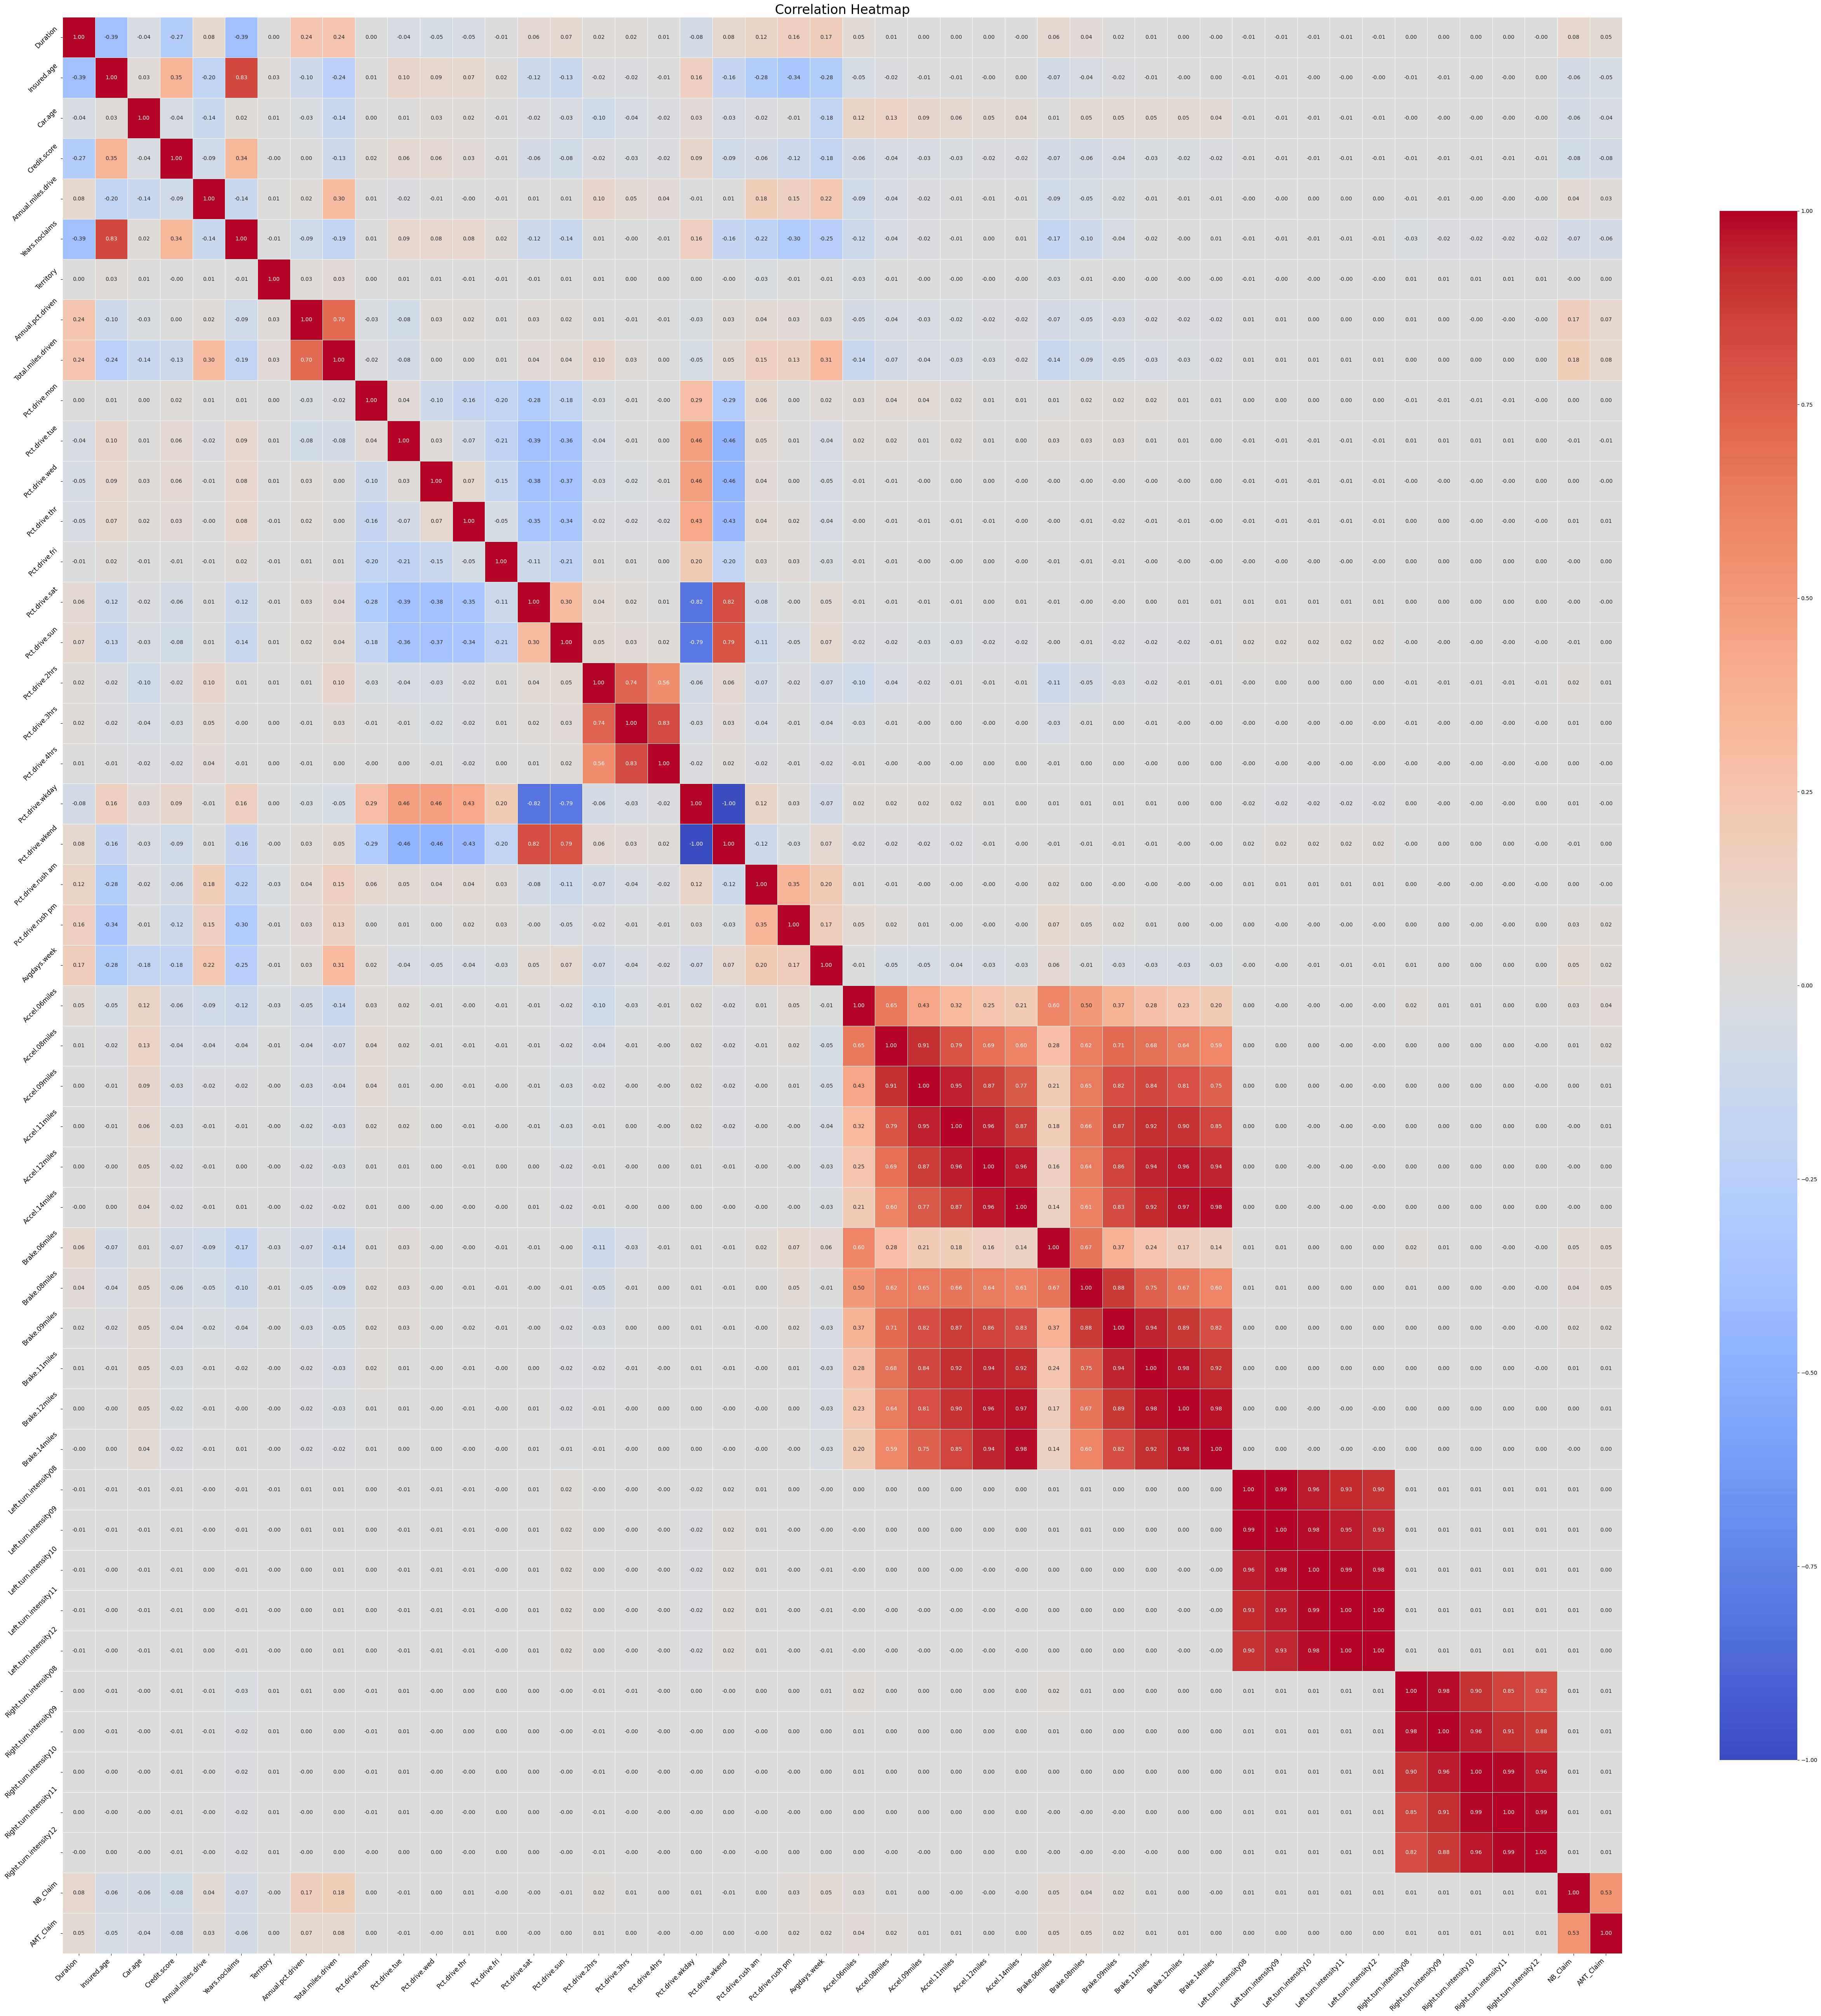

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the data

# Define the column names you provided
column_names = [
    "Duration", "Insured.age", "Insured.sex", "Car.age", "Marital", "Car.use",
    "Credit.score", "Region", "Annual.miles.drive", "Years.noclaims", "Territory",
    "Annual.pct.driven", "Total.miles.driven", "Pct.drive.mon", "Pct.drive.tue",
    "Pct.drive.wed", "Pct.drive.thr", "Pct.drive.fri", "Pct.drive.sat",
    "Pct.drive.sun", "Pct.drive.2hrs", "Pct.drive.3hrs", "Pct.drive.4hrs",
    "Pct.drive.wkday", "Pct.drive.wkend", "Pct.drive.rush am", "Pct.drive.rush pm",
    "Avgdays.week", "Accel.06miles", "Accel.08miles", "Accel.09miles",
    "Accel.11miles", "Accel.12miles", "Accel.14miles", "Brake.06miles",
    "Brake.08miles", "Brake.09miles", "Brake.11miles", "Brake.12miles",
    "Brake.14miles", "Left.turn.intensity08", "Left.turn.intensity09",
    "Left.turn.intensity10", "Left.turn.intensity11", "Left.turn.intensity12",
    "Right.turn.intensity08", "Right.turn.intensity09", "Right.turn.intensity10",
    "Right.turn.intensity11", "Right.turn.intensity12", "NB_Claim", "AMT_Claim"
]

# Ensure all column names are present in the DataFrame
missing_columns = set(column_names) - set(df.columns)
if missing_columns:
    raise KeyError(f"The following columns are missing from the DataFrame: {missing_columns}")

# Remove non-numerical columns from the selection
numerical_columns = [col for col in column_names if df[col].dtype in ['int64', 'float64']]
selected_columns = df[numerical_columns]

# Compute the correlation matrix for the selected numerical columns
correlation_matrix = selected_columns.corr()

# Plot the heatmap
plt.figure(figsize=(52, 52))  # Increase the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",
            annot_kws={"size": 10},  # Use smaller font size for annotations
            cbar_kws={"shrink": .8})  # Adjust colorbar size
plt.title('Correlation Heatmap', fontsize=24)  # Title font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=45, fontsize=12)  # Rotate y-axis labels
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

### Dataset Overview

The dataset used in the study is a synthetic telematics dataset modeled on real data provided by a Canadian insurer. It consists of 100,000 data samples and 52 variables divided into three categories:

1. **Traditional Data**:
   - **Car Age**: Age of the vehicle.
   - **Insured Age**: Age of the policyholder.
   - **Gender**: Gender of the policyholder.
   - **Other Features**: Includes marital status, region, territory, credit score, annual miles driven, and years without claims.

2. **Telematics Data**:
   - **Driving Behavior Metrics**: Total miles driven, harsh acceleration, harsh braking, and various metrics related to turning intensity.
   - **Driving Patterns**: Percentage of driving during different times and conditions (e.g., rush hour).

3. **Response Data**:
   - **NB_Claim**: Number of claims made by a policyholder account.
   - **AMT_Claim**: Total amount paid out from the insurance company for claims.

### Column Definitions

- **NB_Claim**: This column represents the number of claims a policyholder has made. It indicates how many times the policyholder has submitted a claim to the insurance company.

- **AMT_Claim**: This column shows the aggregated sum of claims paid out by the insurance company. It reflects the total financial liability incurred by the insurer due to claims made by the policyholder.

### Additional Information

- A new response variable, **ClaimYN**, was created to classify drivers as risky or not based on the values of **NB_Claim** and **AMT_Claim**:
  - **ClaimYN = 1**: Indicates the driver is considered a risk (more than one claim and total claims amount greater than €1,000).
  - **ClaimYN = 0**: Indicates the driver is not considered a risk.

This dataset allows for the analysis of driving behavior and its correlation with insurance claims, facilitating better risk assessment and pricing models in the insurance industry.

In [9]:
# import pandas as pd
# import numoy as np

# # Create a Risk Category label
# conditions = [
#     (df['NB_Claim'] == 0) & (df['AMT_Claim'] == 0),
#     (df['NB_Claim'] > 0) & (df['NB_Claim'] <= 2),
#     (df['NB_Claim'] > 2)
# ]
# choices = ['Low', 'Medium', 'High']
# df['Risk_Category'] = np.select(conditions, choices, default='Unknown')

# # Create a Driving Behavior Score label
# df['Driving_Behavior_Score'] = (
#     df['Accel 0.6 miles'] + df['Brake 0.6 miles'] +
#     df['Left Turn Intensity 0.8'] + df['Right Turn Intensity 0.8']
# )

# # Create a Claim Frequency label
# df['Frequent_Claimer'] = df['NB_Claim'].apply(lambda x: 'Yes' if x > 2 else 'No')

# # Create a High Mileage Drivers label
# df['High_Mileage_Driver'] = df['Annual Miles Driven'].apply(lambda x: 'Yes' if x > df['Annual Miles Driven'].mean() else 'No')

# # Create a Safe Drivers label
# df['Safe_Driver'] = df.apply(lambda row: 'Yes' if (
#     row['Accel 0.6 miles'] < 10 and
#     row['Brake 0.6 miles'] < 10 and
#     row['Left Turn Intensity 0.8'] < 10 and
#     row['Right Turn Intensity 0.8'] < 10
# ) else 'No', axis=1)

# # Save the updated dataset
# df.to_csv('telematics_syn_updated.csv', index=False)



1. **Risk Category**: Based on the number of claims (`NB_Claim`) and the amount of claims (`AMT_Claim`), we can categorize policyholders into different risk categories (e.g., low, medium, high risk).

2. **Driving Behavior Score**: Create a composite score that quantifies driving behavior by combining metrics like harsh acceleration, harsh braking, and turning intensity.

3. **Claim Frequency**: A label indicating frequent claimers (e.g., policyholders who have made more than a certain number of claims).

4. **High Mileage Drivers**: A label indicating policyholders who drive significantly more miles annually than the average.

5. **Safe Drivers**: A label for policyholders who show safe driving patterns (e.g., low percentages of harsh driving behaviors).


In [10]:
import pandas as pd
import numpy as np

# Create a binary Risk Category label
df['Risk_Category'] = np.where(df['NB_Claim'] == 0, 'Low Risk', 'High Risk')

# Save the updated dataset
df.to_csv('telematics_syn_updated.csv', index=False)

# Display the first few rows to verify the new column
print(df.head())


   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12  NB_Claim    AMT_Claim Risk_Category
0       366           45        Male       -1  Married  Commute         609.0  Urban             6213.71              25         70       

In [11]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

# Display the first few rows of the dataframe
print(df.tail(5))

       Duration  Insured.age Insured.sex  Car.age  Marital     Car.use  Credit.score Region  Annual.miles.drive  Years.noclaims  Territory  Annual.pct.driven  Total.miles.driven  Pct.drive.mon  Pct.drive.tue  Pct.drive.wed  Pct.drive.thr  Pct.drive.fri  Pct.drive.sat  Pct.drive.sun  Pct.drive.2hrs  Pct.drive.3hrs  Pct.drive.4hrs  Pct.drive.wkday  Pct.drive.wkend  Pct.drive.rush am  Pct.drive.rush pm  Avgdays.week  Accel.06miles  Accel.08miles  Accel.09miles  Accel.11miles  Accel.12miles  Accel.14miles  Brake.06miles  Brake.08miles  Brake.09miles  Brake.11miles  Brake.12miles  Brake.14miles  Left.turn.intensity08  Left.turn.intensity09  Left.turn.intensity10  Left.turn.intensity11  Left.turn.intensity12  Right.turn.intensity08  Right.turn.intensity09  Right.turn.intensity10  Right.turn.intensity11  Right.turn.intensity12  NB_Claim  AMT_Claim Risk_Category
99995       182           61        Male       10   Single     Private         824.0  Urban             6213.71              42      

In [12]:
# Count the occurrences of 1's and 0's in Risk_Category
claim_yn_counts = df['Risk_Category'].value_counts()

print(claim_yn_counts)


Risk_Category
Low Risk     95728
High Risk     4272
Name: count, dtype: int64


In [13]:
# Count the occurrences of 1's and 0's in NB_Claim
claim_yn_counts = df['NB_Claim'].value_counts()

print(claim_yn_counts)


NB_Claim
0    95728
1     4061
2      200
3       11
Name: count, dtype: int64


In [14]:
df['Risk_Category']

0        High Risk
1        High Risk
2         Low Risk
3         Low Risk
4         Low Risk
           ...    
99995     Low Risk
99996     Low Risk
99997     Low Risk
99998     Low Risk
99999     Low Risk
Name: Risk_Category, Length: 100000, dtype: object

In [15]:
print(df['NB_Claim'].describe())
print(df['AMT_Claim'].describe())

count    100000.00000
mean          0.04494
std           0.21813
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           3.00000
Name: NB_Claim, dtype: float64
count    100000.000000
mean        137.602253
std        1264.320056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      104074.886700
Name: AMT_Claim, dtype: float64


In [16]:
print(df['Risk_Category'].sample(10))  # Print a random sample of 10 values from the "ClaimYN" column

85754     Low Risk
82592     Low Risk
25838     Low Risk
84195    High Risk
26653     Low Risk
12590     Low Risk
1682      Low Risk
93285     Low Risk
91979     Low Risk
85040     Low Risk
Name: Risk_Category, dtype: object


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('telematics_syn_updated.csv')

# Separate features and labels
X = df.drop(columns=['Risk_Category'])
y = df['Risk_Category']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the transformations
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display the shapes of the resulting datasets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (70000, 58), (70000,)
Validation set: (15000, 58), (15000,)
Testing set: (15000, 58), (15000,)


In [18]:
df.Risk_Category.value_counts()

Risk_Category
Low Risk     95728
High Risk     4272
Name: count, dtype: int64

In [19]:
print("Features Shape:", X.shape)
print("Labels Shape:", y.shape)

Features Shape: (100000, 52)
Labels Shape: (100000,)


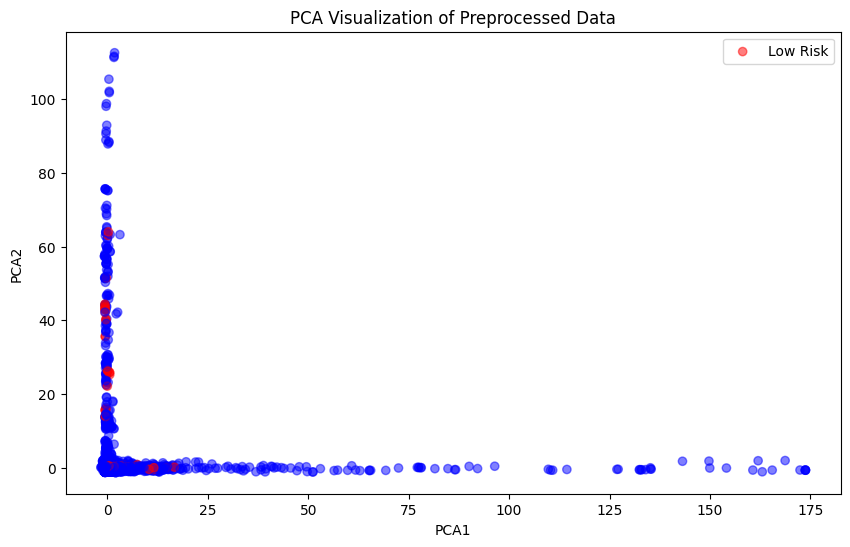

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('telematics_syn_updated.csv')

# Separate features and labels
X = df.drop(columns=['Risk_Category'])
y = df['Risk_Category']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the transformations
X_preprocessed = preprocessor.fit_transform(X)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
# Remove .toarray() as X_preprocessed is already a dense array
X_pca = pca.fit_transform(X_preprocessed)

# Create a DataFrame for visualization
visualization_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
visualization_df['Risk_Category'] = y.values

# Plot the data
plt.figure(figsize=(10, 6))
colors = {'Low Risk': 'blue', 'High Risk': 'red'}
plt.scatter(visualization_df['PCA1'], visualization_df['PCA2'], c=visualization_df['Risk_Category'].map(colors), alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization of Preprocessed Data')
plt.legend(colors)
plt.show()

In [20]:
!pip install pytorch_tabnet

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('telematics_syn_updated.csv')

# Separate features and labels
X = df.drop(columns=['Risk_Category'])
y = df['Risk_Category']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the transformations
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# # Convert to numpy arrays for TabNet
# X_train = X_train.toarray()
# X_val = X_val.toarray()
# X_test = X_test.toarray()

# Initialize and train TabNet model
tabnet = TabNetClassifier()
tabnet.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Evaluate the model
y_pred = tabnet.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.16012 | train_accuracy: 0.96809 | valid_accuracy: 0.9678  |  0:00:07s
epoch 1  | loss: 0.01735 | train_accuracy: 0.99869 | valid_accuracy: 0.99787 |  0:00:11s
epoch 2  | loss: 0.00788 | train_accuracy: 0.99966 | valid_accuracy: 0.99947 |  0:00:16s
epoch 3  | loss: 0.00407 | train_accuracy: 0.99969 | valid_accuracy: 0.99953 |  0:00:21s
epoch 4  | loss: 0.00474 | train_accuracy: 0.99976 | valid_accuracy: 0.9996  |  0:00:26s
epoch 5  | loss: 0.00318 | train_accuracy: 0.99969 | valid_accuracy: 0.99967 |  0:00:30s
epoch 6  | loss: 0.00252 | train_accuracy: 0.99973 | valid_accuracy: 0.99953 |  0:00:35s
epoch 7  | loss: 0.00249 | train_accuracy: 0.99979 | valid_accuracy: 0.99973 |  0:00:40s
epoch 8  | loss: 0.00178 | train_accuracy: 0.99986 | valid_accuracy: 0.9998  |  0:00:45s
epoch 9  | loss: 0.00117 | train_accuracy: 0.99986 | valid_accuracy: 0.9998  |  0:00:50s
epoch 10 | loss: 0.00114 | train_accuracy: 0.99979 | valid_accuracy: 0.9998  |  0:00:54s
epoch 11 | loss: 0.00

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9998
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00       641
    Low Risk       1.00      1.00      1.00     14359

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [25]:
!pip install torch

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, classification_report
import torch # Import the torch module

# Initialize and train TabNet model with Dropout
tabnet = TabNetClassifier(
    n_d=8, n_a=8, n_steps=3, gamma=1.3,
    n_independent=2, n_shared=2,
    lambda_sparse=1e-4, # Regularization parameter
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax"
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=10,
    seed=42,
    clip_value=2.,
    device_name='cuda'
)

tabnet.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Evaluate the model
y_pred = tabnet.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.11172 | train_accuracy: 0.99969 | valid_accuracy: 0.99947 |  0:00:05s
epoch 10 | loss: 0.00013 | train_accuracy: 0.99999 | valid_accuracy: 1.0     |  0:00:55s
epoch 20 | loss: 9e-05   | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:01:43s

Early stopping occurred at epoch 22 with best_epoch = 2 and best_valid_accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 1.0
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00       641
    Low Risk       1.00      1.00      1.00     14359

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [30]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
for train_index, test_index in skf.split(X_preprocessed, y):
    X_train_fold, X_test_fold = X_preprocessed[train_index], X_preprocessed[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Train the model
    tabnet.fit(
        X_train_fold, y_train_fold,
        eval_set=[(X_train_fold, y_train_fold), (X_val, y_val)],
        eval_name=['train', 'valid'],
        eval_metric=['accuracy'],
        max_epochs=200,
        patience=20,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )

    # Evaluate the model
    y_pred_fold = tabnet.predict(X_test_fold)
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(fold_accuracy)

# Calculate average accuracy
mean_accuracy = np.mean(accuracies)
print(f"Cross-validated Accuracy: {mean_accuracy}")


epoch 0  | loss: 0.14513 | train_accuracy: 0.99948 | valid_accuracy: 0.99947 |  0:00:04s
epoch 10 | loss: 0.00022 | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:00:59s
epoch 20 | loss: 0.0001  | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:01:53s

Early stopping occurred at epoch 24 with best_epoch = 4 and best_valid_accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.1375  | train_accuracy: 0.99946 | valid_accuracy: 0.99953 |  0:00:05s
epoch 10 | loss: 0.00039 | train_accuracy: 0.99998 | valid_accuracy: 1.0     |  0:01:00s
epoch 20 | loss: 0.00012 | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:01:54s

Early stopping occurred at epoch 24 with best_epoch = 4 and best_valid_accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.11102 | train_accuracy: 0.9998  | valid_accuracy: 0.9998  |  0:00:05s
epoch 10 | loss: 0.00011 | train_accuracy: 0.99998 | valid_accuracy: 1.0     |  0:01:00s
epoch 20 | loss: 6e-05   | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:01:54s

Early stopping occurred at epoch 22 with best_epoch = 2 and best_valid_accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.1149  | train_accuracy: 0.99922 | valid_accuracy: 0.9992  |  0:00:05s
epoch 10 | loss: 0.00019 | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:00:59s
epoch 20 | loss: 8e-05   | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:01:54s

Early stopping occurred at epoch 21 with best_epoch = 1 and best_valid_accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.1059  | train_accuracy: 0.99984 | valid_accuracy: 0.99987 |  0:00:05s
epoch 10 | loss: 0.00013 | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:01:00s
epoch 20 | loss: 9e-05   | train_accuracy: 0.99998 | valid_accuracy: 1.0     |  0:01:58s

Early stopping occurred at epoch 21 with best_epoch = 1 and best_valid_accuracy = 1.0


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Cross-validated Accuracy: 0.99997


In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Split the resampled dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize and train TabNet model
tabnet = TabNetClassifier()
tabnet.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Evaluate the model
y_pred = tabnet.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.26144 | train_accuracy: 0.99846 | valid_accuracy: 0.99791 |  0:00:09s
epoch 1  | loss: 0.00445 | train_accuracy: 0.9996  | valid_accuracy: 0.99979 |  0:00:19s
epoch 2  | loss: 0.00226 | train_accuracy: 0.99982 | valid_accuracy: 0.99979 |  0:00:30s
epoch 3  | loss: 0.00091 | train_accuracy: 0.99998 | valid_accuracy: 1.0     |  0:00:40s
epoch 4  | loss: 0.00037 | train_accuracy: 0.99997 | valid_accuracy: 0.9999  |  0:00:50s
epoch 5  | loss: 0.00019 | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:01:00s
epoch 6  | loss: 0.00012 | train_accuracy: 0.99999 | valid_accuracy: 0.99995 |  0:01:11s
epoch 7  | loss: 0.00011 | train_accuracy: 1.0     | valid_accuracy: 1.0     |  0:01:21s
epoch 8  | loss: 9e-05   | train_accuracy: 0.99999 | valid_accuracy: 0.99995 |  0:01:31s
epoch 9  | loss: 0.00013 | train_accuracy: 0.99998 | valid_accuracy: 0.9999  |  0:01:41s
epoch 10 | loss: 0.0001  | train_accuracy: 0.99998 | valid_accuracy: 0.99995 |  0:01:52s
epoch 11 | loss: 8e-0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 1.0
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00      9573
    Low Risk       1.00      1.00      1.00      9573

    accuracy                           1.00     19146
   macro avg       1.00      1.00      1.00     19146
weighted avg       1.00      1.00      1.00     19146



In [40]:
# Adjust the weights according to the imbalance
tabnet = TabNetClassifier() # Initialize without class_weights
tabnet.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    weights={'Low Risk': 1.0, 'High Risk': 20.0}  # Use string labels for classes
)

# Evaluate the model
y_pred = tabnet.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.10815 | train_accuracy: 0.99009 | valid_accuracy: 0.98877 |  0:00:10s
epoch 1  | loss: 0.00784 | train_accuracy: 0.99331 | valid_accuracy: 0.99488 |  0:00:21s
epoch 2  | loss: 0.00261 | train_accuracy: 0.99775 | valid_accuracy: 0.99838 |  0:00:30s
epoch 3  | loss: 0.00149 | train_accuracy: 0.99899 | valid_accuracy: 0.99864 |  0:00:40s
epoch 4  | loss: 0.00098 | train_accuracy: 0.99925 | valid_accuracy: 0.99937 |  0:00:51s
epoch 5  | loss: 0.00082 | train_accuracy: 0.99975 | valid_accuracy: 0.99958 |  0:01:01s
epoch 6  | loss: 0.00053 | train_accuracy: 0.9999  | valid_accuracy: 1.0     |  0:01:10s
epoch 7  | loss: 0.00174 | train_accuracy: 0.99675 | valid_accuracy: 0.99702 |  0:01:21s
epoch 8  | loss: 0.00101 | train_accuracy: 0.9999  | valid_accuracy: 0.9999  |  0:01:32s
epoch 9  | loss: 0.0002  | train_accuracy: 0.9996  | valid_accuracy: 0.99979 |  0:01:43s
epoch 10 | loss: 0.00028 | train_accuracy: 0.99992 | valid_accuracy: 0.99995 |  0:01:52s
epoch 11 | loss: 0.00

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.9998955395382848
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00      9573
    Low Risk       1.00      1.00      1.00      9573

    accuracy                           1.00     19146
   macro avg       1.00      1.00      1.00     19146
weighted avg       1.00      1.00      1.00     19146



In [41]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_preprocessed, y)

# Continue with the training and evaluation as before
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

tabnet = TabNetClassifier()
tabnet.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Evaluate the model
y_pred = tabnet.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.78856 | train_accuracy: 0.53782 | valid_accuracy: 0.52108 |  0:00:00s
epoch 1  | loss: 0.6892  | train_accuracy: 0.64872 | valid_accuracy: 0.65105 |  0:00:00s
epoch 2  | loss: 0.64148 | train_accuracy: 0.68339 | valid_accuracy: 0.68618 |  0:00:01s
epoch 3  | loss: 0.5868  | train_accuracy: 0.73475 | valid_accuracy: 0.73536 |  0:00:01s
epoch 4  | loss: 0.54894 | train_accuracy: 0.74938 | valid_accuracy: 0.74707 |  0:00:02s
epoch 5  | loss: 0.49165 | train_accuracy: 0.812   | valid_accuracy: 0.78571 |  0:00:02s
epoch 6  | loss: 0.40733 | train_accuracy: 0.90022 | valid_accuracy: 0.89344 |  0:00:03s
epoch 7  | loss: 0.28027 | train_accuracy: 0.95333 | valid_accuracy: 0.95785 |  0:00:03s
epoch 8  | loss: 0.15968 | train_accuracy: 0.99093 | valid_accuracy: 0.99063 |  0:00:04s
epoch 9  | loss: 0.08168 | train_accuracy: 0.99546 | valid_accuracy: 0.99766 |  0:00:04s
epoch 10 | loss: 0.03757 | train_accuracy: 0.99429 | valid_accuracy: 0.99415 |  0:00:05s
epoch 11 | loss: 0.04

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

   High Risk       0.99      1.00      1.00       428
    Low Risk       1.00      0.99      1.00       427

    accuracy                           1.00       855
   macro avg       1.00      1.00      1.00       855
weighted avg       1.00      1.00      1.00       855

